## DecissionTree Classification and Visualization on **_`Iris flower`_** data
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)
* [Original Link](https://mljar.com/blog/visualize-decision-tree/)



#### Import Packages
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#### We are using **_`Iris flower`_** data from sklearn library
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

* Prepare the data in **X** and **y**

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Fit the classifier with default hyper-parameters
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [3]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

#### Print Text Representation
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

* Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. 
* ***`sklearn.tree.export_text`***

In [4]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



#### Saving the above tree in text format (.log)
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [5]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### Plot Decision  Tree with  ***`sklearn.tree.plot_tree`***
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)
* It requires **_`matplotlib`_** to be installed. 
* It allows us to easily produce figure of the tree (without intermediate exporting to _**`graphviz`**_).
* The  ***`plot_tree`*** returns annotations for the plot, to not show them in the notebook I assigned returned value to '_'.



#### Like this
```
[Text(167.4, 199.32, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 ....................................................................
 Text(309.04615384615386, 90.6, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]
```


> #### Note
* I’m using _**`filled = True`**_ in the plot_tree.
* When this parameter is set to _**True**_ the method uses color to indicate the majority of the class. (It will be nice if there will be some legend with class and color matching.)

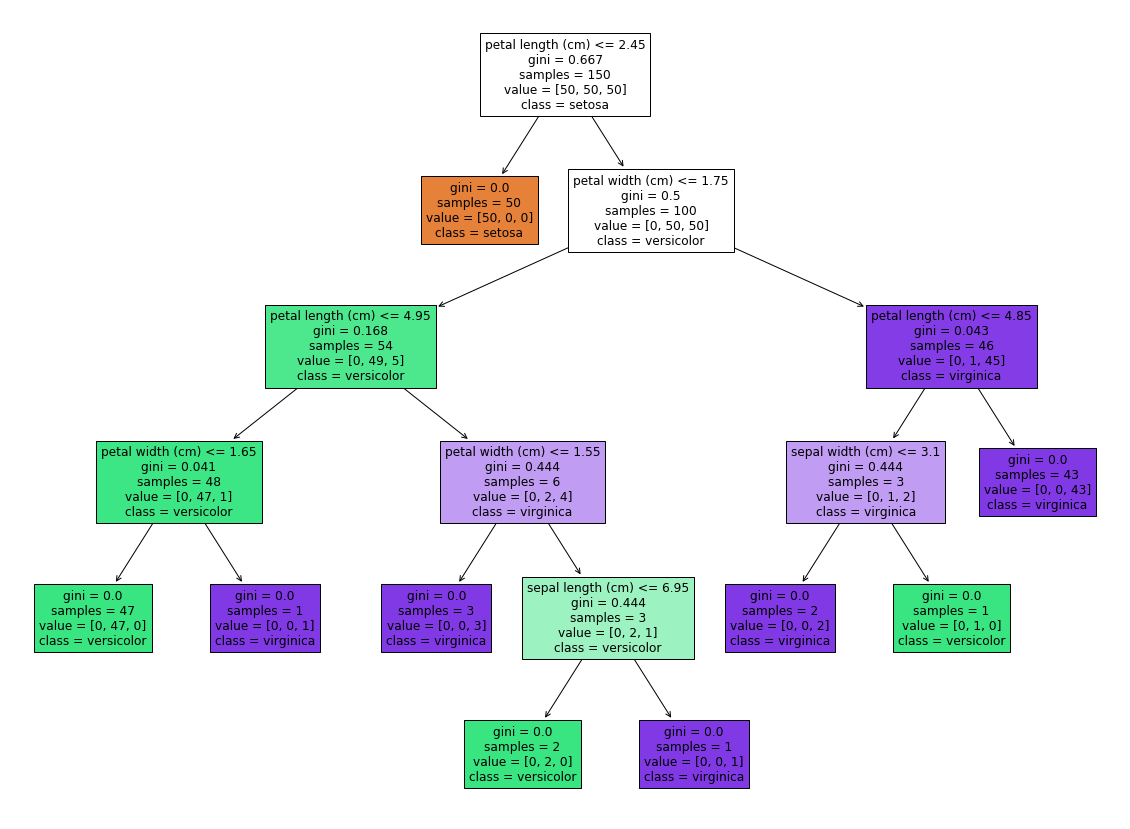

In [6]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

#### To save the figure to the .png file
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [7]:
fig.savefig("decistion_tree.png")

### Plot Decision Tree with **_`graphviz`_** Package
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)
* Please make sure that you have **_`graphviz`_** installed (_**`pip install graphviz`**_).
* To plot the tree first we need to export it to `DOT` format with ***`sklearn.tree.export_graphviz`*** method (link to [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)). 
* Then we can plot it in the notebook or save to the file.


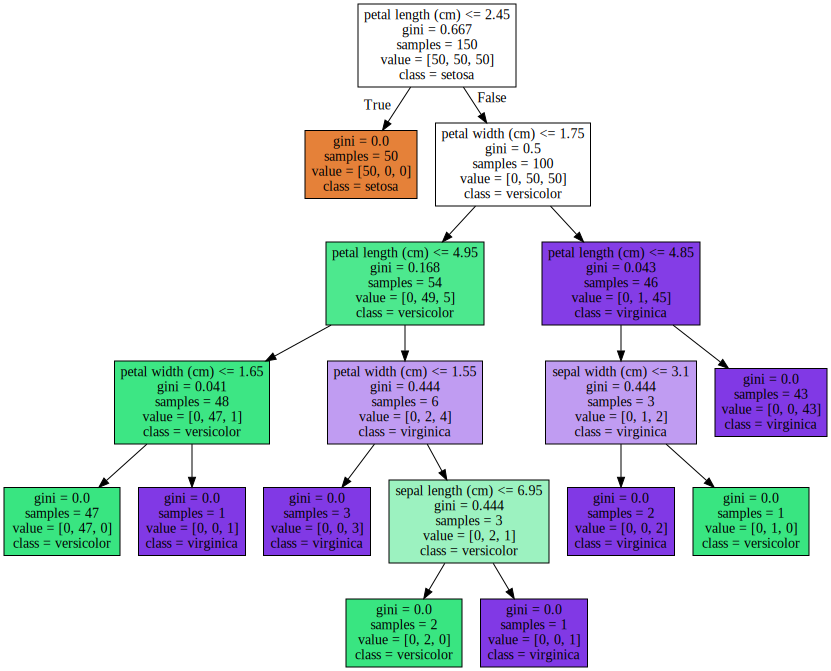

In [8]:
import graphviz

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#### To save the figure to the .png file
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

In [9]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Plot Decision Tree with **_`dtreeviz`_** Package
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)

* It can be installed with _`pip install dtreeviz`_. 
* It requires **_`graphviz`_** to be installed (but you dont need to manually convert between DOT files and images).


d:\virtualenvs\mldls\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


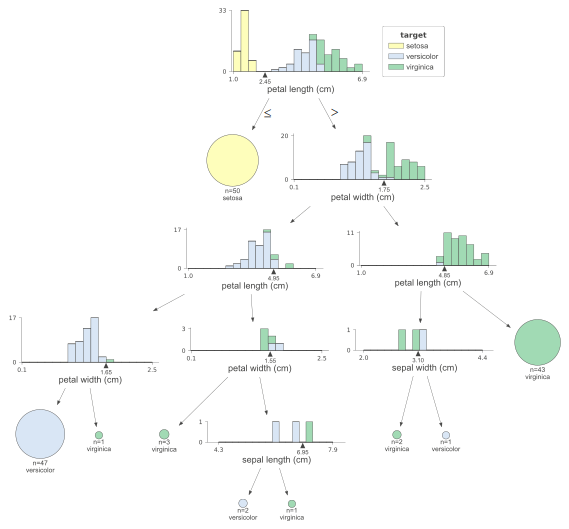

In [10]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names),
                scale=1.0)

viz

#### To save the figure to the .svg file
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

In [11]:
viz.save("decision_tree.svg")

### More links
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)

* [More output types on  **_`dtreeviz`_** Package](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/examples.ipynb)